In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="darkgrid")

# Load results

## synth results

In [8]:
filename = '2020-07-20_results_synt_dataset-0.csv'
path_to_data = '../recipes/echo_aware_processing/' + filename
results_synt = pd.read_csv(path_to_data)
results_synt

,Unnamed: 0,array,dataset,target_idx,interf_idx,sir,snr,bf,sar_out,sir_in,snr_in,sir_out,snr_out,pesq_in,pesq_out
0,0,0.0,0.0,0.0,2.0,0.0,0.0,dpDS,-0.181171,3.843722,0.016723,3.839404,4.626775,1.607849,1.823829
1,1,0.0,0.0,0.0,2.0,0.0,0.0,rtfMVDR,1.560748,3.843722,0.016723,14.806505,7.377262,1.607849,2.042755
2,2,0.0,0.0,0.0,2.0,0.0,0.0,ecoMVDR,5.940404,3.843722,0.016723,15.274916,9.330708,1.607849,2.081715
3,3,0.0,0.0,0.0,2.0,0.0,0.0,rtfLCMV,2.727148,3.843722,0.016723,12.481733,8.614247,1.607849,2.077130
4,4,0.0,0.0,0.0,2.0,0.0,0.0,ecoLCMV,6.068493,3.843722,0.016723,32.477993,8.901009,1.607849,2.189639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
670,670,4.0,0.0,3.0,2.0,20.0,20.0,dpDS,-5.199537,23.752631,19.989176,27.854599,25.829348,2.813720,3.155295
671,671,4.0,0.0,3.0,2.0,20.0,20.0,rtfMVDR,5.897403,23.752631,19.989176,36.178521,29.427420,2.813720,3.260120
672,672,4.0,0.0,3.0,2.0,20.0,20.0,ecoMVDR,5.979474,23.752631,19.989176,35.764813,29.410032,2.813720,3.266737
673,673,4.0,0.0,3.0,2.0,20.0,20.0,rtfLCMV,5.887442,23.752631,19.989176,38.567787,28.688456,2.813720,3.213328


## real results

In [9]:
filename = '2020-07-20_results_real_dataset-0.csv'
path_to_data = '../recipes/echo_aware_processing/' + filename
results_real = pd.read_csv(path_to_data)
results_real

,Unnamed: 0,array,dataset,target_idx,interf_idx,sir,snr,bf,sar_out,sir_in,snr_in,sir_out,snr_out,pesq_in,pesq_out
0,0,0.0,0.0,0.0,2.0,0.0,0.0,dpDS,8.447090,4.431923,0.016517,4.706376,0.714566,1.831684,1.828054
1,1,0.0,0.0,0.0,2.0,0.0,0.0,rtfMVDR,4.749968,4.431923,0.016517,4.445838,15.282132,1.831684,2.186316
2,2,0.0,0.0,0.0,2.0,0.0,0.0,ecoMVDR,-7.616602,4.431923,0.016517,1.413840,22.072900,1.831684,2.154031
3,3,0.0,0.0,0.0,2.0,0.0,0.0,rtfLCMV,3.738065,4.431923,0.016517,8.893983,9.606846,1.831684,2.084647
4,4,0.0,0.0,0.0,2.0,0.0,0.0,ecoLCMV,-6.579361,4.431923,0.016517,1.501333,21.567717,1.831684,2.039267
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
670,670,4.0,0.0,3.0,2.0,20.0,20.0,dpDS,6.416155,23.619349,19.998676,26.623468,19.384594,2.828686,2.745897
671,671,4.0,0.0,3.0,2.0,20.0,20.0,rtfMVDR,5.599419,23.619349,19.998676,24.334816,33.251091,2.828686,3.201500
672,672,4.0,0.0,3.0,2.0,20.0,20.0,ecoMVDR,-7.436438,23.619349,19.998676,22.596502,46.192309,2.828686,3.168029
673,673,4.0,0.0,3.0,2.0,20.0,20.0,rtfLCMV,5.537022,23.619349,19.998676,31.069612,31.089114,2.828686,3.188405


In [10]:
results_real['data'] = 'real'
results_synt['data'] = 'synt'
results = pd.concat([results_synt, results_real], ignore_index=True)
results

,Unnamed: 0,array,dataset,target_idx,interf_idx,sir,snr,bf,sar_out,sir_in,snr_in,sir_out,snr_out,pesq_in,pesq_out,data
0,0,0.0,0.0,0.0,2.0,0.0,0.0,dpDS,-0.181171,3.843722,0.016723,3.839404,4.626775,1.607849,1.823829,synt
1,1,0.0,0.0,0.0,2.0,0.0,0.0,rtfMVDR,1.560748,3.843722,0.016723,14.806505,7.377262,1.607849,2.042755,synt
2,2,0.0,0.0,0.0,2.0,0.0,0.0,ecoMVDR,5.940404,3.843722,0.016723,15.274916,9.330708,1.607849,2.081715,synt
3,3,0.0,0.0,0.0,2.0,0.0,0.0,rtfLCMV,2.727148,3.843722,0.016723,12.481733,8.614247,1.607849,2.077130,synt
4,4,0.0,0.0,0.0,2.0,0.0,0.0,ecoLCMV,6.068493,3.843722,0.016723,32.477993,8.901009,1.607849,2.189639,synt
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1345,670,4.0,0.0,3.0,2.0,20.0,20.0,dpDS,6.416155,23.619349,19.998676,26.623468,19.384594,2.828686,2.745897,real
1346,671,4.0,0.0,3.0,2.0,20.0,20.0,rtfMVDR,5.599419,23.619349,19.998676,24.334816,33.251091,2.828686,3.201500,real
1347,672,4.0,0.0,3.0,2.0,20.0,20.0,ecoMVDR,-7.436438,23.619349,19.998676,22.596502,46.192309,2.828686,3.168029,real
1348,673,4.0,0.0,3.0,2.0,20.0,20.0,rtfLCMV,5.537022,23.619349,19.998676,31.069612,31.089114,2.828686,3.188405,real


# Investigation

## Global metrics vs bf

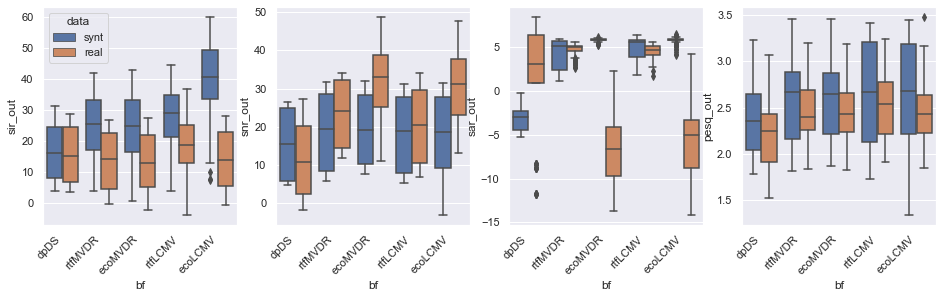

In [11]:
loc_res = results.copy()
# plot
plt.figure(figsize=(16,4))
plt.subplot(141)
g = sns.boxplot(x='bf', y="sir_out", hue='data', data=loc_res)
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.subplot(142)
g = sns.boxplot(x='bf', y="snr_out", hue='data', data=loc_res)
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')
g.legend_.remove()

plt.subplot(143)
g = sns.boxplot(x='bf', y="sar_out", hue='data', data=loc_res)
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')
g.legend_.remove()

plt.subplot(144)
g = sns.boxplot(x='bf', y="pesq_out", hue='data', data=loc_res)
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')
g.legend_.remove()
plt.show()

## Incemental metrics vs bf

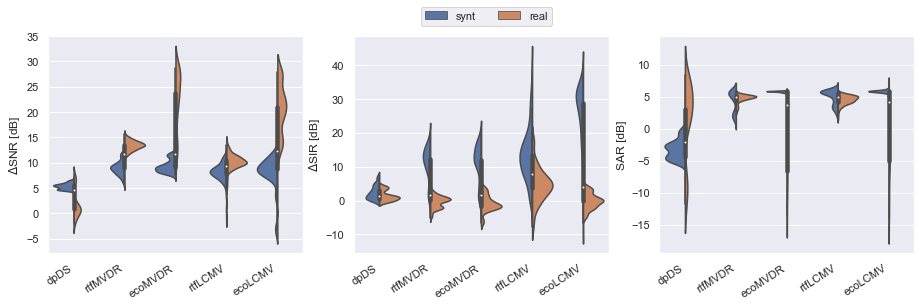

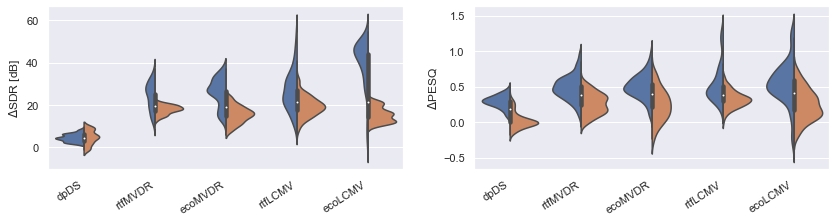

In [12]:
loc_res = results.copy()
loc_res['sir_inc'] = loc_res['sir_out'] - loc_res['sir_in']
loc_res['snr_inc'] = loc_res['snr_out'] - loc_res['snr_in']
loc_res['pesq_inc'] = loc_res['pesq_out'] - loc_res['pesq_in']
loc_res['sdr_inc'] = loc_res['sir_inc'] + loc_res['snr_inc'] + loc_res['sar_out']
# plot
plt.figure(figsize=(21,4))
plt.subplot(141)
g1 = sns.violinplot(x='bf', y="snr_inc", hue='data', data=loc_res, split=True)
g1.set_xticklabels(g1.get_xticklabels(), rotation=33, horizontalalignment='right')
g1.legend_.remove()
g1.set(ylabel=r'$\Delta$SNR [dB]', xlabel='')

plt.subplot(142)
g2 = sns.violinplot(x='bf', y="sir_inc", hue='data', data=loc_res, split=True)
g2.set_xticklabels(g2.get_xticklabels(), rotation=33, horizontalalignment='right')
g2.legend_.remove()
g2.legend(bbox_to_anchor=(0.3, 0.66, 0.5, 0.5), loc=1, ncol=2)
g2.set(ylabel=r'$\Delta$SIR [dB]', xlabel='')

plt.subplot(143)
g4 = sns.violinplot(x='bf', y="sar_out", hue='data', data=loc_res, split=True)
g4.set_xticklabels(g4.get_xticklabels(), rotation=33, horizontalalignment='right')
g4.legend_.remove()
g4.set(ylabel=r'SAR [dB]', xlabel='')

plt.savefig('../recipes/echo_aware_processing/bsseval_results_box.pdf', dpi=300)
plt.show()


plt.figure(figsize=(14,3))
plt.subplot(121)
g4 = sns.violinplot(x='bf', y="sdr_inc", hue='data', data=loc_res, split=True)
g4.set_xticklabels(g4.get_xticklabels(), rotation=33, horizontalalignment='right')
g4.legend_.remove()
g4.set(ylabel=r'$\Delta$SDR [dB]', xlabel='')

plt.subplot(122)
g3 = sns.violinplot(x='bf', y="pesq_inc", hue='data', data=loc_res, split=True)
g3.set_xticklabels(g.get_xticklabels(), rotation=33, horizontalalignment='right')
g3.legend_.remove()
g3.set(ylabel=r'$\Delta$PESQ', xlabel='')
plt.savefig('../recipes/echo_aware_processing/pesq_results_violin.pdf', dpi=300)
plt.show()

In [20]:
loc_res = results.copy()
loc_res['sir_inc'] = loc_res['sir_out'] - loc_res['sir_in']
loc_res['snr_inc'] = loc_res['snr_out'] - loc_res['snr_in']
loc_res['pesq_inc'] = loc_res['pesq_out'] - loc_res['pesq_in']
loc_res['sdr_inc'] = loc_res['sdr_out'] - loc_res['sdr_in']

# beautiful plot
width = 0.7

# plot
plt.figure(figsize=(21,4))
plt.subplot(141)
g1 = sns.boxplot(x='bf', y="snr_inc", hue='data', data=loc_res, width=width)
g1.set_xticklabels(g1.get_xticklabels(), rotation=33, horizontalalignment='right')
g1.legend_.remove()
g1.set(ylabel=r'$\Delta$SNR [dB]', xlabel='')

plt.subplot(142)
g2 = sns.boxplot(x='bf', y="sir_inc", hue='data', data=loc_res, width=width)
g2.set_xticklabels(g2.get_xticklabels(), rotation=33, horizontalalignment='right')
g2.legend_.remove()
g2.legend(bbox_to_anchor=(0.3, 0.66, 0.5, 0.5), loc=1, ncol=2)
g2.set(ylabel=r'$\Delta$SIR [dB]', xlabel='')

plt.subplot(143)
g4 = sns.boxplot(x='bf', y="sar_out", hue='data', data=loc_res, width=width)
g4.set_xticklabels(g4.get_xticklabels(), rotation=33, horizontalalignment='right')
g4.legend_.remove()
g4.set(ylabel=r'SAR [dB]', xlabel='')

plt.savefig('../recipes/echo_aware_processing/bsseval_results_boxplot.pdf', dpi=300)
plt.show()


plt.figure(figsize=(14,3))
plt.subplot(121)
g4 = sns.boxplot(x='bf', y="sdr_inc", hue='data', data=loc_res, width=width)
g4.set_xticklabels(g4.get_xticklabels(), rotation=33, horizontalalignment='right')
g4.legend_.remove()
g4.set(ylabel=r'$\Delta$SDR [dB]', xlabel='')

plt.subplot(122)
g3 = sns.boxplot(x='bf', y="pesq_inc", hue='data', data=loc_res, width=width)
g3.set_xticklabels(g.get_xticklabels(), rotation=33, horizontalalignment='right')
g3.legend_.remove()
g3.set(ylabel=r'$\Delta$PESQ', xlabel='')
plt.savefig('../recipes/echo_aware_processing/pesq_results_boxplot.pdf', dpi=300)
plt.show()

KeyError: 'sdr_out'

# Performance vs Dataset (~ RT60)

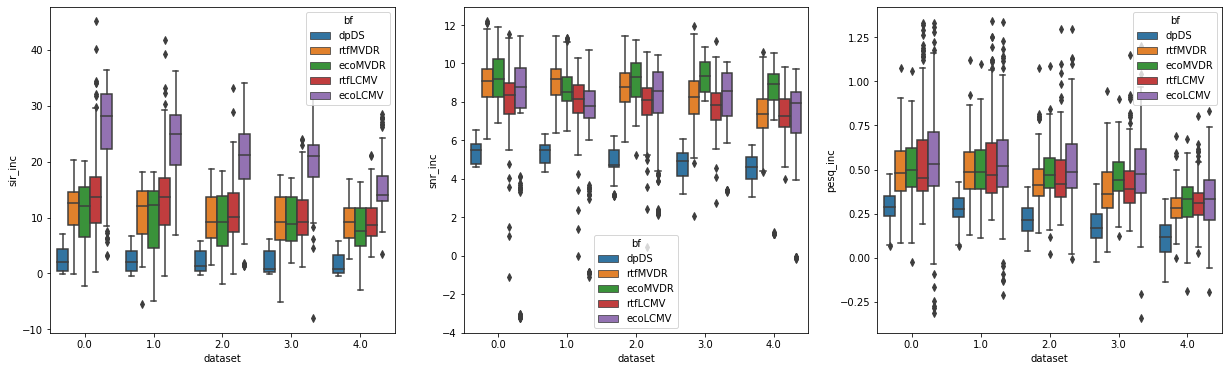

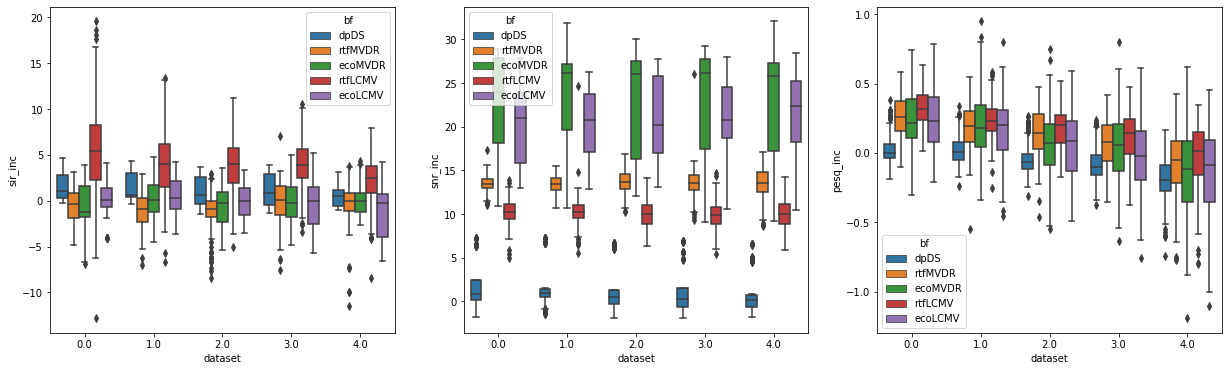

In [6]:
# filter
loc_res_synt = results_synt.copy()
loc_res_real = results_real.copy()
loc_ress = [loc_res_synt, loc_res_real]
# plot
for loc_res in loc_ress:

    loc_res['sir_inc'] = loc_res['sir_out'] - loc_res['sir_in']
    loc_res['snr_inc'] = loc_res['snr_out'] - loc_res['snr_in']
    loc_res['pesq_inc'] = loc_res['pesq_out'] - loc_res['pesq_in']
    # plot
    varx = 'dataset'
    varh = 'bf'
    plt.figure(figsize=(21,6))
    plt.subplot(131)
    sns.boxplot(x=varx, y="sir_inc", hue=varh,
                data=loc_res)
    plt.subplot(132)
    sns.boxplot(x=varx, y="snr_inc", hue=varh,
                data=loc_res)
    plt.subplot(133)
    sns.boxplot(x=varx, y="pesq_inc", hue=varh,
                data=loc_res)
    plt.show()

# Performance vs Geomtery (~ DDR)

In [7]:
# filter
loc_res = results.copy()
loc_res['sir_inc'] = loc_res['sir_out'] - loc_res['sir_in']
loc_res['snr_inc'] = loc_res['snr_out'] - loc_res['snr_in']
loc_res['pesq_inc'] = loc_res['pesq_out'] - loc_res['pesq_in']
# plot
grid = sns.axisgrid.FacetGrid(loc_res, row='array', col='target_idx', sharey=True)
grid.map(sns.boxplot, 'bf', 'sir_inc')

NameError: name 'results' is not defined

In [ ]:
# filter
loc_res = results.copy()
loc_res['sir_inc'] = loc_res['sir_out'] - loc_res['sir_in']
loc_res['snr_inc'] = loc_res['snr_out'] - loc_res['snr_in']
loc_res['pesq_inc'] = loc_res['pesq_out'] - loc_res['pesq_in']
# plot
grid = sns.axisgrid.FacetGrid(loc_res, row='array', col='target_idx', sharey=True)
grid.map(sns.boxplot, 'bf', 'snr_inc')

In [ ]:
# filter
loc_res = results.copy()
loc_res['sir_inc'] = loc_res['sir_out'] - loc_res['sir_in']
loc_res['snr_inc'] = loc_res['snr_out'] - loc_res['snr_in']
loc_res['pesq_inc'] = loc_res['pesq_out'] - loc_res['pesq_in']
# plot
varx = 'array'
varh = 'bf'
plt.figure(figsize=(21,6))
plt.subplot(131)
sns.boxplot(x=varx, y="sir_inc", hue=varh,
            data=loc_res)
plt.subplot(132)
sns.boxplot(x=varx, y="snr_inc", hue=varh,
            data=loc_res)
plt.subplot(133)
sns.boxplot(x=varx, y="pesq_inc", hue=varh,
            data=loc_res)
plt.show()

In [8]:
# filter
loc_res = results.copy()
loc_res['sir_inc'] = loc_res['sir_out'] - loc_res['sir_in']
loc_res['snr_inc'] = loc_res['snr_out'] - loc_res['snr_in']
loc_res['pesq_inc'] = loc_res['pesq_out'] - loc_res['pesq_in']
# plot
varx = 'target_idx'
varh = 'bf'
plt.figure(figsize=(21,6))
plt.subplot(131)
sns.boxplot(x=varx, y="sir_inc", hue=varh,
            data=loc_res)
plt.subplot(132)
sns.boxplot(x=varx, y="snr_inc", hue=varh,
            data=loc_res)
plt.subplot(133)
sns.boxplot(x=varx, y="pesq_inc", hue=varh,
            data=loc_res)
plt.show()

NameError: name 'results' is not defined

In [ ]:
res